In [216]:
! pip install folium

In [226]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [218]:
file = open("../raw_data/cleaned_businesses.pickle",'rb')
data_reviews = pickle.load(file)
file.close()

# Preprocessing 

## Deleting columns 

In [219]:
#Dropping is closed because everything is closed
#Dropping distance because no sense 
#Dropping transactions because only composed of: []
data_reviews.head(2)
data_use=data_reviews.drop(columns=['image_url', 'is_closed', 'distance', 'transactions'])

## Handling the price field


In [151]:
data_use.price.value_counts()

€€      1558
€        785
€€€      539
€€€€      64
Name: price, dtype: int64

In [152]:
def replace_price(x):
    if x == "€":
        return 1
    if x == "€€": 
        return 2 
    if x == "€€€": 
        return 3 
    if x == "€€€€": 
        return 4 

In [154]:
data_use.price = data_use.price.map(replace_price)

## Others 

In [127]:
data_use.columns

Index(['id', 'alias', 'name', 'url', 'review_count', 'rating', 'phone',
       'display_phone', 'price', 'latitude', 'longitude', 'address1',
       'address2', 'address3', 'city', 'zip_code', 'country', 'state',
       'display_address', 'alias_1', 'title_1', 'alias_2', 'title_2',
       'alias_3', 'title_3'],
      dtype='object')

In [136]:
data_use.head()

,id,alias,name,url,review_count,rating,phone,display_phone,price,latitude,...,zip_code,country,state,display_address,alias_1,title_1,alias_2,title_2,alias_3,title_3
0,LLwMMNR2X84qnYWEjL8iJQ,atelier-de-impressão-cadigital-lisboa,Atelier de Impressão - Cadigital,https://www.yelp.com/biz/atelier-de-impress%C3...,1,3.0,+351217122442,+351 21 712 2442,NaN,38.754582,...,1500-545,PT,11,"[R. República da Bolívia, 97, 1500-545 Lisbon,...",copyshops,Printing Services,3dprinting,3D Printing,screen_printing_tshirt_printing,Screen Printing/T-Shirt Printing
1,FcXRFTG4mH9n_0K3GQXR9w,feel-rio-lisboa,Feel Rio,https://www.yelp.com/biz/feel-rio-lisboa?adjus...,5,4.0,+351215888645,+351 21 588 8645,€,38.710996,...,1100-185,PT,11,"[R. Crucifixo, 108, 1100-185 Lisbon, Portugal]",brazilian,Brazilian,juicebars,Juice Bars & Smoothies,acaibowls,Acai Bowls
2,OC-bzpOIFvqjmk-3JMu23Q,bowl-lisboa,Bowl,https://www.yelp.com/biz/bowl-lisboa?adjust_cr...,2,4.5,+351215879592,+351 21 587 9592,NaN,38.717801,...,1350-166,PT,11,"[R. Francisco Metrass, 34, 1350-166 Lisbon, Po...",juicebars,Juice Bars & Smoothies,acaibowls,Acai Bowls,NaN,NaN
3,my5oNNumojOxC0BbCXRxhw,luvaria-ulisses-lisboa,Luvaria Ulisses,https://www.yelp.com/biz/luvaria-ulisses-lisbo...,19,4.5,+351213420295,+351 21 342 0295,€€€,38.712356,...,1200-093,PT,11,"[R. do Carmo, 87, 1200-093 Lisbon, Portugal]",accessories,Accessories,NaN,NaN,NaN,NaN
4,0DyhgfjZBeyPbU0VxdHkZg,modistas-de-lisboa-lisboa,Modistas de Lisboa,https://www.yelp.com/biz/modistas-de-lisboa-li...,4,4.5,+351938716732,+351 938 716 732,NaN,38.712132,...,1200-246,PT,11,"[R. Luz Soriano, 67, 1200-246 Lisbon, Portugal]",sewingalterations,Sewing & Alterations,accessories,Accessories,fabricstores,Fabric Stores


# Exploration and Data Viz 

## Repartition of reviews : 

(array([1.000e+00, 0.000e+00, 1.170e+02, 1.700e+01, 1.720e+02, 1.990e+02,
        1.926e+03, 1.375e+03, 2.689e+03, 1.999e+03]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

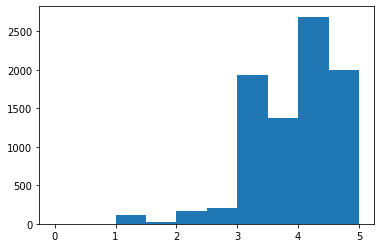

In [134]:
# Repartition of reviews
plt.hist(data_use.rating)

In [311]:
# number of reviews per store: 
data_use.review_count.box()

AttributeError: 'Series' object has no attribute 'box'

average number of review per store: 4.553384343731607
Some outliers with many reviews: 


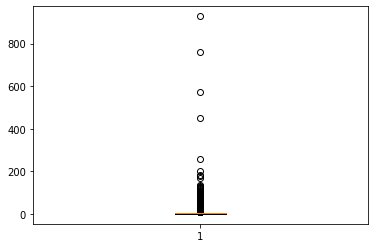

In [144]:
# number of reviews per store: 
plt.boxplot(data_use.review_count)

print('average number of review per store:', data_use.review_count.mean())
print('Some outliers with many reviews: ')

## Relationship between number of reviews and review score: 


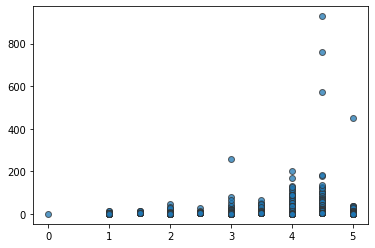

In [146]:
plt.scatter(data_use.rating, data_use.review_count,  edgecolor='#333333', alpha=0.75)

## Mapping of coordinates of restaurant with folium 

In [161]:
data_use[['id', 'name', 'rating', 'latitude', 'longitude']]

,id,name,rating,latitude,longitude
0,LLwMMNR2X84qnYWEjL8iJQ,Atelier de Impressão - Cadigital,3.0,38.754582,-9.196797
1,FcXRFTG4mH9n_0K3GQXR9w,Feel Rio,4.0,38.710996,-9.139010
2,OC-bzpOIFvqjmk-3JMu23Q,Bowl,4.5,38.717801,-9.166361
3,my5oNNumojOxC0BbCXRxhw,Luvaria Ulisses,4.5,38.712356,-9.139726
4,0DyhgfjZBeyPbU0VxdHkZg,Modistas de Lisboa,4.5,38.712132,-9.145770
...,...,...,...,...,...
19179,_g2EOpB6NqRJtBMDYCkuHA,Muse,4.0,NaN,NaN
19184,TMmDKbsgV9Ym2TGKo9gblQ,Casa Mami,3.0,NaN,NaN
19185,VBQVXDzvEp4NUHX6wzkiXA,Fashionrio,3.5,NaN,NaN
19187,OqJ6DdCA8C7Xq1BjhAOFQA,SedNoc,2.5,NaN,NaN


In [244]:
import os 
import folium

In [221]:
m.save("map_project.html")

In [292]:
data_2=data_use.dropna().sample(n=100)
latlonname= zip(data_2['latitude'],data_2['longitude'], data_2['name'], data_2['price'], data_2['rating'])

m = folium.Map(location=[38.7166,  -9.1483], titles='small businesses', zoom_start=14)

for coord in latlonname:
    folium.Marker(location=[coord[0], coord[1]], popup= (coord[2:5]), fill_color='#43d9de', radius=8 ).add_to(m)
    
m

# Mapping of coordinates of restaurant with Bokhe

In [302]:
!pip install bokeh

     |████████████████████████████████| 18.5 MB 16.3 MB/s            
     |████████████████████████████████| 192 kB 3.2 MB/s            


In [304]:
#import modules

import pandas as pd
import numpy as np

from bokeh.models import *
from bokeh.plotting import *
from bokeh.io import *
from bokeh.tile_providers import *
from bokeh.palettes import *
from bokeh.transform import *
from bokeh.layouts import *

In [307]:
#Bokeh maps are in mercator. Convert lat lon fields to mercator units for plotting

def wgs84_to_web_mercator(df, lon, lat):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

df=wgs84_to_web_mercator(data_2,'longitude','latitude')

#Establishing a zoom scale for the map. The scale variable will also determine proportions for hexbins and bubble maps so that everything looks visually appealing. 

scale=2000
x=df['x']
y=df['y']

#The range for the map extents is derived from the lat/lon fields. This way the map is automatically centered on the plot elements.

x_min=int(x.mean() - (scale * 350))
x_max=int(x.mean() + (scale * 350))
y_min=int(y.mean() - (scale * 350))
y_max=int(y.mean() + (scale * 350))

#Defining the map tiles to use. I use OSM, but you can also use ESRI images or google street maps.

tile_provider=get_provider(OSM)

#Establish the bokeh plot object and add the map tile as an underlay. Hide x and y axis.

plot=figure(
    title='2019 Iraq Conflict Events',
    match_aspect=True,
    tools='wheel_zoom,pan,reset,save',
    x_range=(x_min, x_max),
    y_range=(y_min, y_max),
    x_axis_type='mercator',
    y_axis_type='mercator',
    width=500
    )

plot.grid.visible=True

map=plot.add_tile(tile_provider)
map.level='underlay'

plot.xaxis.visible = False
plot.yaxis.visible=False
plot.title.text_font_size="20px"

output_notebook()

Loading BokehJS ...

In [308]:
def hex_map(plot,df, scale,leg_label='Hexbin Heatmap'):
  r,bins=plot.hexbin(x,y,size=scale*10,hover_color='pink',hover_alpha=0.8,legend_label=leg_label)
  hex_hover = HoverTool(tooltips=[('count','@c')],mode='mouse',point_policy='follow_mouse',renderers=[r])
  hex_hover.renderers.append(r)
  plot.tools.append(hex_hover)
  
  plot.legend.location = "top_right"
  plot.legend.click_policy="hide"

In [310]:
#Create the hexbin map
hex_map(plot=plot,
        df=df, 
        scale=scale,
        leg_label='Iraq Conflict Events by Number of Events')